In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Kolikon heittoa</h2>

Seuraavassa simuloin ensiksi kolikon heittoa miljoona kertaa.
Tulokset tallennan flips-nimiseen muuttujaan.

Seuraavaksi lasken sequences-nimiseen muuttujaan, kuinka monta kertaa sama tulos tulee peräkkäin.

Tulostan kahdella eri menetelmällä eri pituisten saman tuloksen jonojen lukumäärät.

In [2]:
flips = np.random.randint(2, size = 1000000) #tuottaa sattumanvaraisesti ykkösiä ja nollia

print('Heads:', str(np.sum(flips)), 'Tails:', str(np.sum(1-flips)))

Heads: 499944 Tails: 500056


In [3]:
sequences = []
sequence = 1

for i in range(len(flips)-1):
    if flips[i]==flips[i+1]:
        sequence+=1
    else:
        sequences.append(sequence)
        sequence = 1

In [4]:
import collections

counter=collections.Counter(sequences)
print(counter)

Counter({1: 250916, 2: 124916, 3: 62461, 4: 31247, 5: 15708, 6: 7784, 7: 3876, 8: 1970, 9: 920, 10: 496, 11: 224, 12: 115, 13: 66, 14: 22, 15: 16, 16: 9, 17: 3, 19: 1, 22: 1, 18: 1})


In [5]:
np.unique(sequences, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 22]),
 array([250916, 124916,  62461,  31247,  15708,   7784,   3876,   1970,
           920,    496,    224,    115,     66,     22,     16,      9,
             3,      1,      1,      1], dtype=int64))

<h2>Kahden nopan heittoa</h2>

Seuraavassa heitän kahta noppaa tuhat kertaa.
Maskien avulla saan kätevästi selville eri silmälukujen määrät kummallekin nopalle ja parien määrät.

Tuotan otsikoidun tulostaulukon dataframea käyttäen.

Lopuksi tulostan silmälukujen summien lukumäärät pylväskaaviona.

In [6]:
rolls = np.random.randint(6, size = (1000, 2)) + 1

for i in range(1, 7):
    mask1 = rolls[:,0] == i #ensimmäinen noppa
    mask2 = rolls[:,1] == i #toinen noppa
    mask3 = mask1 & mask2 #pari (molemmilla sama tulos)
    print(i, mask1.sum(), mask2.sum(), mask3.sum())

1 177 165 25
2 161 153 25
3 165 144 29
4 168 201 31
5 148 155 24
6 181 182 28


In [7]:
results = pd.DataFrame(columns = ['Dots', 'Dice1', 'Dice2', 'Pairs'])

for i in range(1, 7):
    mask1 = rolls[:,0] == i
    mask2 = rolls[:,1] == i
    mask3 = mask1 & mask2
    results = results.append({'Dots':i, 'Dice1':mask1.sum(), 'Dice2':mask2.sum(), 'Pairs':mask3.sum()}, ignore_index=True)
    
print(results.to_string(index=False))

Dots Dice1 Dice2 Pairs
   1   177   165    25
   2   161   153    25
   3   165   144    29
   4   168   201    31
   5   148   155    24
   6   181   182    28


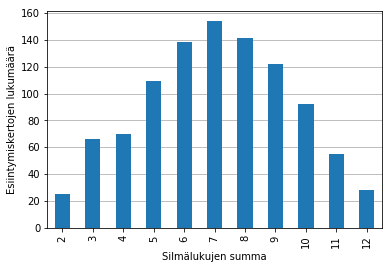

In [8]:
df = pd.DataFrame(rolls)
df['sum'] = df.sum(axis=1)

ax = df['sum'].value_counts(sort=False).plot.bar()

#Pientä tuunausta
ax.set_xlabel('Silmälukujen summa')
ax.set_ylabel('Esiintymiskertojen lukumäärä')
ax.grid(axis='y')
ax.set_axisbelow(True)